# NumPy Exercises

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2021](https://github.com/escape2020/school2021)

In [1]:
import numpy as np
import numba as nb
import numexpr as ne
import sys

print(f"Python version:  {sys.version}\n"
      f"NumPy version:   {np.__version__}\n"
      f"Numba version:   {nb.__version__}\n"
      f"NumExpr version:   {ne.__version__}")

rng = np.random.default_rng(42)  # initialise our random number generator

Python version:  3.9.4 | packaged by conda-forge | (default, May 10 2021, 22:10:52) 
[Clang 11.1.0 ]
NumPy version:   1.20.3
Numba version:   0.53.1
NumExpr version:   2.7.3


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 5)
plt.rcParams['figure.dpi'] = 300

## Exercise 1: Extract the integer part of a random sample

    rng.uniform(0, 10, 10)
    
e.g. `[23.5, 42.0, 500.3, 123.9] -> [23, 42, 500, 123]`

### Solution:

In [3]:
a = np.array([23.5, 42.0, 500.3, 123.9])
a

array([ 23.5,  42. , 500.3, 123.9])

In [4]:
a - a%1

array([ 23.,  42., 500., 123.])

In [5]:
np.floor(a)

array([ 23.,  42., 500., 123.])

In [6]:
np.ceil(a) - 1

array([ 23.,  41., 500., 123.])

In [7]:
np.trunc(a)

array([ 23.,  42., 500., 123.])

In [8]:
a.astype(int)

array([ 23,  42, 500, 123])

### Further discussions

In [9]:
a = rng.uniform(0, 10, 10000)

In [10]:
%timeit a - a%1

104 µs ± 3.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit np.floor(a)

3.45 µs ± 22.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit np.ceil(a) - 1

5.78 µs ± 35.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%timeit np.trunc(a)

3.48 µs ± 20.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [14]:
%timeit a.astype(int)  # the winner -> casting

1.26 µs ± 7.76 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 2: Create a 5x5 matrix with 5's on its diagonal

```
5 0 0 0 0
0 5 0 0 0
0 0 5 0 0
0 0 0 5 0
0 0 0 0 5
```

### Solution: `np.eye()`

In [15]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [16]:
np.eye(5) * 5

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

In [17]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Alternative solutions and further discussions

In [18]:
%%timeit
a = np.eye(1000) * 5

634 µs ± 111 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit
a = np.eye(1000)
np.multiply(a, 5, out=a)  # avoid creating a copy 

589 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit
a = np.zeros((1000, 1000))
a[np.diag_indices_from(a)] = 5

312 µs ± 5.57 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
a = np.zeros((10, 10))
np.diag_indices_from(a)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [22]:
%timeit np.diag(np.full(1000, 5))

308 µs ± 9.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
%timeit np.diag(np.ones(1000) * 5)

303 µs ± 5.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Numba?

In [24]:
@nb.njit
def diag_nb(n, value):
    return np.diag(np.ones(n) * value)

In [25]:
%timeit diag_nb(1000, 5)

298 µs ± 5.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [26]:
@nb.njit
def diag2_nb(n, value):
    mat = np.zeros((n, n))
    for i in range(n):
        mat[i,i] = value
    return mat

In [27]:
%timeit diag2_nb(1000, 5)

296 µs ± 4.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Exercise 3: Calculate `c`, with:

    a = rng.random(1234567)
    b = rng.random(1234567)
  
so that

$$
c_i = \tan(a_i) \cdot b_i - a_i^{b_i}
$$

for $i \in [0, 1234566]$

In [28]:
a = rng.random(1234567)
b = rng.random(1234567)

### Solution:

In [29]:
def f(a, b):
    return np.tan(a) * b - a**b

In [30]:
%timeit f(a, b)

17 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%timeit ne.evaluate("tan(a)*b - a**b")

4.1 ms ± 400 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### What about a Python loop?

In [32]:
def tanabab(a, b):
    c = np.empty_like(a)
    for i in range(len(a)):
        c[i] = np.tan(a[i]) * b[i] - np.power(a[i], b[i])
    return c

In [33]:
%timeit tanabab(a, b)

2.27 s ± 31.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Let's JIT it with `numba`!

In [34]:
@nb.jit
def tanabab_nb(a, b):
    c = np.empty_like(a)
    for i in range(len(a)):
        c[i] = np.tan(a[i]) * b[i] - np.power(a[i], b[i])
    return c

In [35]:
%time tanabab_nb(a, b)  # first execution includes the compilation!

CPU times: user 90.5 ms, sys: 2.38 ms, total: 92.9 ms
Wall time: 92.2 ms


array([-0.01106144, -0.66248701, -0.32489978, ..., -0.21608449,
       -0.13017545, -0.16956306])

In [36]:
%timeit tanabab_nb(a, b)  # the second is pure LLVM optimised code

15.9 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
@nb.jit
def tanabab_nb_mutating_a(a, b):
    for i in range(len(a)):
        a[i] = np.tan(a[i]) * b[i] - np.power(a[i], b[i])

In [38]:
%time tanabab_nb_mutating_a(a, b);  # first execution includes the compilation!

CPU times: user 56.2 ms, sys: 2.02 ms, total: 58.2 ms
Wall time: 60.3 ms


In [39]:
a = rng.random(1234567)
b = rng.random(1234567)

In [40]:
%timeit tanabab_nb_mutating_a(a, b);  # the second is pure LLVM optimised code

7.67 ms ± 142 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Summary (your mileage may vary):
- **~2200ms** (Python)
- **~75ms** (reusing `a`, numba, inc. JIT comp.)
- **~60ms** (numba, inc. JIT comp.)
- **~17ms** (numpy)
- **~16ms** (numba, JIT)
- **~8ms** (reusing `a`, numba, JIT)
- **~4ms** (numexpr)

## Exercise 4: Given two arrays `a` anb `b`, check if they are (almost) equal

    a = np.random.random(1234567)
    b = a.copy()

    b[-1] = 23  # artificially make them differ at the very end ;)

In [41]:
a = rng.random(1234567)
b = a.copy()
c = a.copy()

b[-1] = 23  # make them differ at the very end ;)
c[0] = 23   # make them differ at the beginning

### Solution:

In [42]:
%timeit np.allclose(a, b)

4.18 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [43]:
%timeit np.allclose(a, c)

4.16 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Using numba?

In [44]:
@nb.jit
def allclose(a, b, tol=0.0001):
    for i in range(len(a)):
        if np.abs(a[i] - b[i]) > tol:
            return False 
    return True

In [45]:
%timeit allclose(a, b)

811 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [46]:
%timeit allclose(a, c)

265 ns ± 10.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [47]:
%timeit np.count_nonzero(a == b) == a.size

635 µs ± 64.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Exercise 5: Create the following matrix

    1 2 3 4 5 6
    1 2 3 4 5 6
    1 2 3 4 5 6
    1 2 3 4 5 6
    1 2 3 4 5 6


### Solution:

In [48]:
np.ones((5, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [49]:
np.arange(1, 7)

array([1, 2, 3, 4, 5, 6])

In [50]:
np.ones((5, 6)) * np.arange(1, 7)

array([[1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.]])

In [51]:
np.ones(5)[:, np.newaxis] * np.arange(1, 7)

array([[1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.]])

### Alternative solutions and further discussions

In [52]:
%timeit np.ones((500, 6)) * np.arange(1, 7)

5.66 µs ± 133 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [53]:
%%timeit
a = np.ones((500, 6))
np.multiply(a, np.arange(1, 7), out=a)

5.62 µs ± 87.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [54]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [55]:
np.ones(5).shape

(5,)

In [56]:
np.ones(5)[:, np.newaxis] * np.arange(1, 7)

array([[1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.],
       [1., 2., 3., 4., 5., 6.]])

In [57]:
%timeit np.ones(500)[:, np.newaxis] * np.arange(1, 7)

6.78 µs ± 88.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [58]:
%%timeit
a = np.empty((500, 6))
a[:] = np.arange(1, 7)

2.13 µs ± 77.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [59]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [60]:
np.ones(5)[:, np.newaxis]  # adds a new dimension

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [61]:
np.ones(5)[:, np.newaxis].shape

(5, 1)

In [62]:
np.arange(1, 7).shape

(6,)

In [63]:
# broadcasting will turn (5, 1) and (6,) into (5, 6)
(np.ones(5)[:, np.newaxis] * np.arange(1, 7)).shape

(5, 6)

### Numba?

In [64]:
@nb.njit
def grad_nb(n, m):
    mat = np.empty((n, m))
    for i in range(m):
        for j in range(n):
            mat[j,i] = i + 1
    return mat

In [65]:
%timeit grad_nb(500, 6)

1.33 µs ± 15.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [66]:
int_type = np.int32

@nb.njit
def grad_int_nb(n, m):
    mat = np.empty((n, m), dtype=int_type)
    for i in range(1, m):
        for j in range(n):
            mat[j,i] = i + 1
    return mat

In [67]:
%timeit grad_int_nb(500, 6)

1.14 µs ± 6.06 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 6: Roll two 6-sided dice 100 times and count each individual value

### Solution:

This is an ugly, hardcoded solution:

In [68]:
def roll_dice(n):
    dice_1 = rng.integers(1, 6, n)
    dice_2 = rng.integers(1, 6, n)
    sums = dice_1 + dice_2
    return np.unique(sums, return_counts=True)

In [69]:
roll_dice(100)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 6,  9,  9, 18, 18, 20,  7,  9,  4]))

## Exercise 7: Roll five 12-sided dice 123456 times and count each individual value

If you did it right, you now only need to change 2 parameters of your previous code ;)

If not, write an appropriate function.

Create a histogram of the values!

### Solution:

In [70]:
def roll_dice(n_rolls, n_sides, n_die):
    rolls = np.sum(rng.integers(1, n_sides+1, n_rolls*n_die)
                   .reshape(n_die, n_rolls), axis=0)
    return np.unique(rolls, return_counts=True)

In [71]:
rolls = roll_dice(123456, 12, 5)

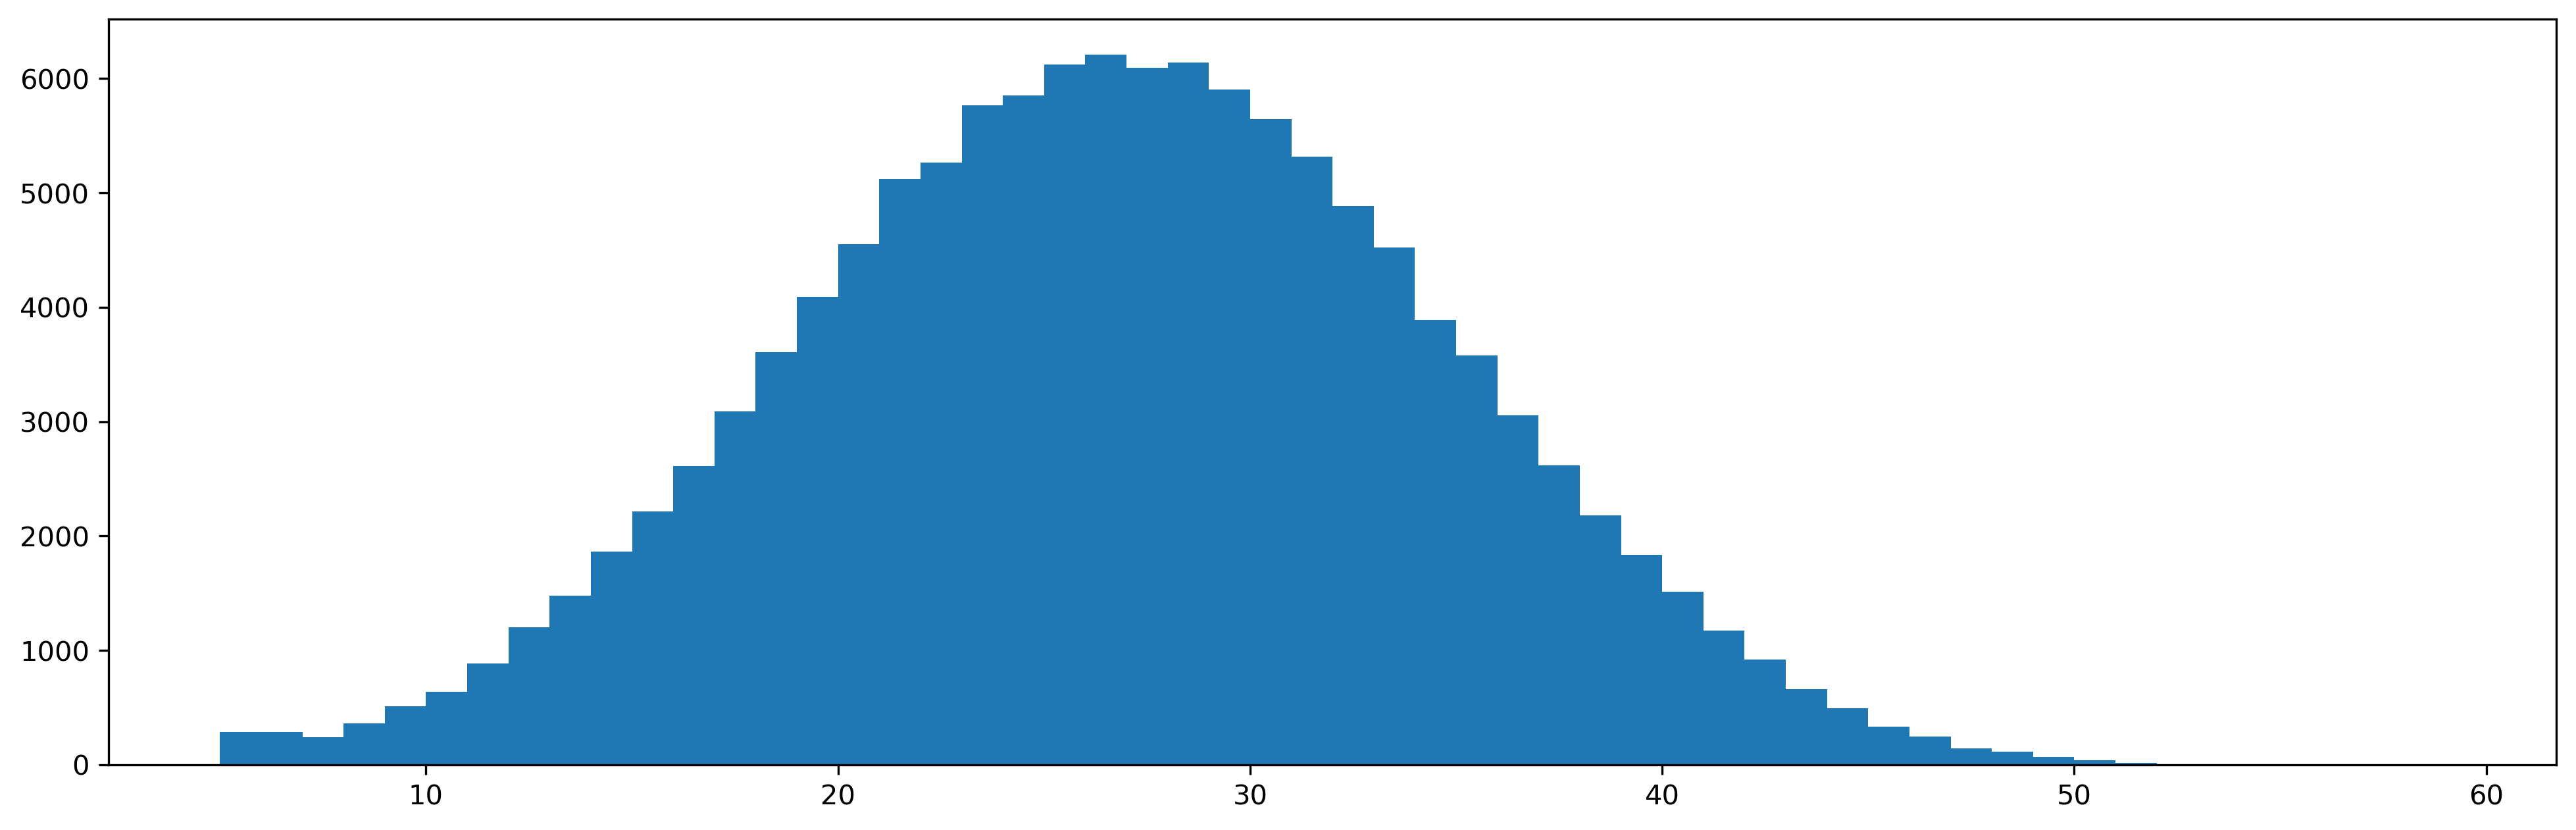

In [72]:
plt.hist(range(len(rolls[1])), bins=rolls[0], weights=rolls[1]);

## Exercise 8: Find the value closest to a given number in an array

    a = rng.random(10)
    target = 0.23

### Solution:

In [73]:
a = rng.random(10)
target = 0.23
a

array([0.88422871, 0.48558074, 0.9052416 , 0.0752361 , 0.06916456,
       0.05940674, 0.59183429, 0.76920539, 0.80313491, 0.91361757])

In [74]:
a[np.argmin(np.abs(a - target))]

0.07523610127287217

### Numba?

In [75]:
a = rng.random(1000)

In [76]:
%timeit a[np.argmin(np.abs(a - target))]

2.23 µs ± 9.72 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [77]:
@nb.jit
def find_closest(arr, target):
    idx = 0
    delta = np.nan
    for i in range(len(arr)):
        _delta = abs(arr[i] - target)
        if _delta < delta:
            delta = _delta
            idx = i
    return arr[idx]

In [78]:
%timeit find_closest(a, 0.23)

1.43 µs ± 11.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 9: Create a random array with 10 elements and replace its largest value with 0

## Bonus: Replace the second largest value with 0

### Solution:

In [79]:
a = rng.integers(0, 100, 10)
a

array([25, 56, 23, 62,  9, 87, 54, 75, 75, 11])

In [80]:
np.argmax(a)  # gives the index of the maximum
a[np.argmax(a)] = 0
a

array([25, 56, 23, 62,  9,  0, 54, 75, 75, 11])

### Solution for the bonus:

In [81]:
a = rng.integers(0, 100, 10)
a

array([25, 28, 96, 30, 39, 38, 69, 77, 95, 53])

In [82]:
idx = a.argsort()[-2]  # index of the second largest value
a[idx] = 0
a

array([25, 28, 96, 30, 39, 38, 69, 77,  0, 53])

In [83]:
a[np.argpartition(a, -2)[-2]] = 0
a

array([25, 28, 96, 30, 39, 38, 69,  0,  0, 53])

This `np.argpartition` thing is a bit tricky, let's examine this...

In [84]:
a = np.array([5, 4, 7, 9])

`np.partition` will "partition" the array, so that the it guarantees that the element at the specified index will sit in the correct position **and** every element to the left is less or equal and every element to the right is greater or equal to it (in undefined order).

In [85]:
np.partition(a, 1)

array([4, 5, 7, 9])

Here, you can see that if the array "was" sorted (it would be 4, 5, 7, 9), the `5` should sit at the position 1 (counting from 0). This can be much quicker than sorting the full array.

In the solution above, we pass `-2` which means that the second last element should sit in place, so that we catch the two "largest" values (they are either the same or the last one is the largest).

`np.argpartition` will return the indices instead, which we can use to pick the position of the n-th largest element and set it to zero.

In [86]:
np.argpartition(a, 1)  # the index of five (0) is sitting on position 1

array([1, 0, 2, 3])

### Numba?

In [87]:
a = np.random.random(10000000)

In [88]:
%timeit a[np.argmax(a)] = 0

3.29 ms ± 49.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [89]:
@nb.njit
def zero_largest(arr):
    idx = 0
    largest = arr[0]
    for i in range(len(arr)):
        if arr[i] > largest:
            largest = arr[i]
            idx = i
    arr[idx] = 0.0

In [90]:
%timeit zero_largest(a)

42.6 ms ± 434 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Using numba to solve the bonus exercise

In [91]:
a = rng.random(10000000)

In [92]:
%%timeit
idx = np.argsort(a)[-2]
a[idx] = 0

1.28 s ± 42.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%%timeit 
a[np.argpartition(a, -2)[-2]] = 0

105 ms ± 9.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
@nb.njit
def zero_second_largest(arr):
    idx_largest = 0
    idx_second_largest = 0
    largest = arr[0]
    second_largest = 0
    for i in range(len(arr)):
        if arr[i] > largest:
            second_largest, largest = largest, arr[i]
            idx_second_largest, idx_largest = idx_largest, i
    arr[idx_second_largest] = 0

In [95]:
%timeit zero_second_largest(a)

40.9 ms ± 268 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Exercise 10: Create a checkerboard (8x8, 0s and 1s)

    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0
    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0
    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0
    0 1 0 1 0 1 0 1
    1 0 1 0 1 0 1 0

### Solution:

In [96]:
checkerboard = np.zeros((8, 8), dtype='i')
checkerboard[::2, 1::2] = 1
checkerboard[1::2, ::2] = 1
checkerboard

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]], dtype=int32)

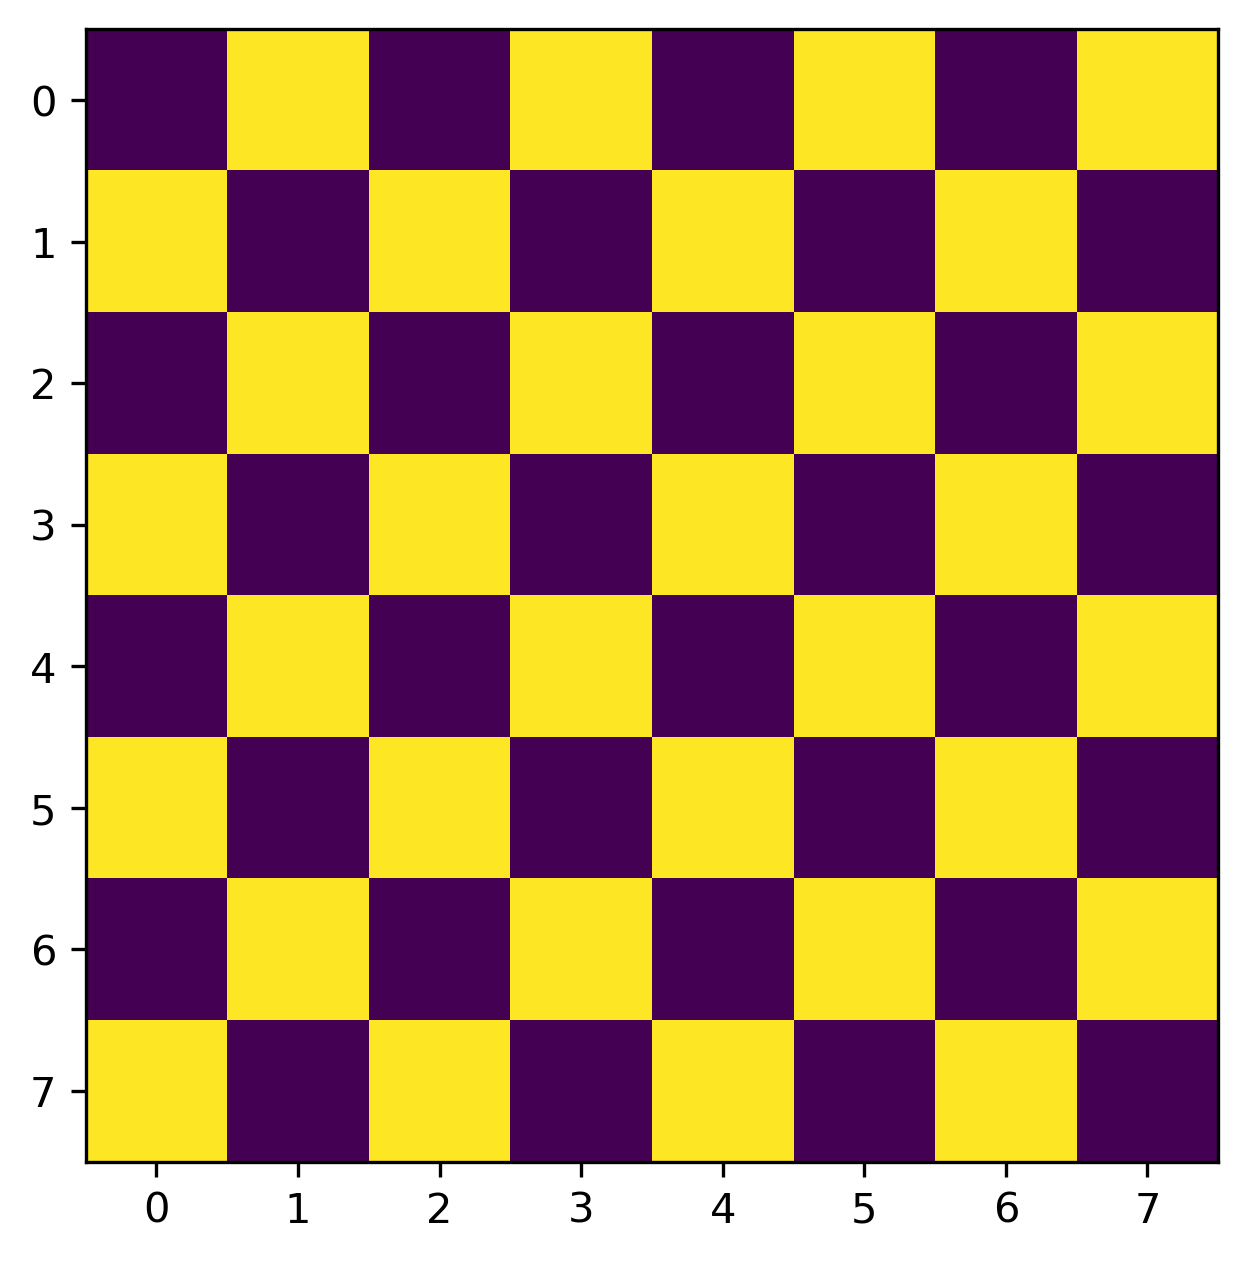

In [97]:
plt.imshow(checkerboard)

###  Numba?

In [98]:
%%timeit
checkerboard = np.zeros((8, 8), dtype='i')
checkerboard[::2, 1::2] = 1
checkerboard[1::2, ::2] = 1
checkerboard

757 ns ± 6.99 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [99]:
import numpy as np
import numba as nb

In [100]:
@nb.njit
def checkerboard(n):
    board = np.zeros((n, n), dtype='i')
    for i in range(n):
        for j in range(n):
            k = i + j*2
            while k >= n:
                k = k - n
            board[k,i] = 1
            
    return board

In [101]:
checkerboard(8)

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]], dtype=int32)

In [102]:
%timeit checkerboard(8)

336 ns ± 4.69 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Exercise 11: Calculate the diagonal of a dot product

In [103]:
A = rng.random((5, 5))
B = rng.random((5, 5))

### Solution:

In [104]:
%timeit np.diag(np.dot(A, B))

1.91 µs ± 24.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [105]:
%timeit np.sum(A * B.T, axis=1)

2.52 µs ± 44.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [106]:
%timeit np.einsum("ij,ji->i", A, B)

1.18 µs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
